<div style="direction:rtl;line-height:300%;background-color:#282C34;border-radius: 25px;">
	<img src='https://ut.ac.ir/assets/d7a19645/images/logos/loading-logo.png' alt="UT logo" width="110" height="110" align="left" style='padding-top: 15px; padding-left: 20px;'>
	<img src="https://engstudent.ut.ac.ir/wp-content/uploads/Fanni-Transparent.png" width="150" height="112" align="right" style='padding-top: 15px; padding-right: 20px;'>
	<font face="XB Zar" size=5>
		<div align=center>
			<font face="IranNastaliq" size=30 color=white>
				<p></p>
				<p></p>
به نام خدا
			</font>
			<br />
			<br />
			<font color=#1597E5>
دانشگاه تهران - دانشکده مهندسی برق و کامپیوتر
            </font>
            <br />
			<font color=#69DADB>
هوش مصنوعی
            </font>
			<br />
			<font color=#FFA400>
پاییز ۱۴۰۰
		</div>
		<hr color=#6ECB63/>
		<font color=#FF5C58 size=6>
			<div align=center>
پروژه سوم - Naïve Bayes
            </div>
		</font>
        <br />
		<div align=center>
		<font color=yellow>
حسام اسداله‌زاده 
            <br />
            شماره دانشجویی: ۸۱۰۱۹۸۳۴۶
			</font>
        </div>
		<!hr color=#6ECB63/>
		<style type="text/css" scoped>
        p{
        border: 1px solid #a2a9b1;background-color: #f8f9fa;display: inline-block;
        };
        </style>            
		
</div>

In [1]:
import parsivar
import hazm
import arabic_reshaper
from bidi.algorithm import get_display
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
traindf = pd.read_csv('divar_train.csv')
traindf.head()

,title,description,categories
0,بلبل خرمایی,سه عدد بلبل خرمایی سه ماهه.از وقتی جوجه بودن خ...,leisure-hobbies
1,عینک اسکی در حد,عینک اسکی دبل لنز مارک يو وكس در حد نو اصلی م...,leisure-hobbies
2,تکیه سر تویوتا پرادو,پارچه ای سالم و تمیز.,vehicles
3,مجسمه کریستال24%,مجسمه دکوری کریستال بالرین Rcr24%,for-the-home
4,کیف و ساک,هر 2 کاملا تمیز هستند,personal


In [3]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        10200 non-null  object
 1   description  10200 non-null  object
 2   categories   10200 non-null  object
dtypes: object(3)
memory usage: 239.2+ KB


In [4]:
testdf = pd.read_csv('divar_test.csv')
testdf.head()

,title,description,categories
0,کیف مجلسی نو,کیف مجلسی نوی نو,personal
1,دیوار کوب نمدی تزیینی,مناسب برای جهاز عروس,for-the-home
2,دو تیکه بسیار بسیار تمیز و سالم,با کشوی مخفی و شیک,for-the-home
3,مودم,سلام مودم سالم با وسایلش،دیگه ب کارم نمیاد \nم...,electronic-devices
4,تعداد18عددبوقلمون به قیمت عمده,سلام تعدای بوقلمون دارم به علت جابه جایی به فر...,leisure-hobbies


## Preprocessing:

In [5]:
traindf['combined'] = traindf['description'] + ' ' + traindf['title']
testdf['combined'] = testdf['description'] + ' ' + testdf['title']

In [6]:
stemmer = hazm.Stemmer()
lemmatizer = hazm.Lemmatizer()
normalizer = hazm.Normalizer()
mynormalizer = parsivar.Normalizer()
mytokenizer = parsivar.Tokenizer()

In [7]:
punctuations = '''!()-[]{};:'"\,٬٫،<>./?@#$%٪^&*×ـ+=_~.؟؛«»|‌…'''
stops = {'فقط', 'قیمت', 'را', 'برای', 'به', 'با','که', 'از', 'در', 'اما','اگر', 'اگه', 'تا', 'هر','و', '.', 'و', 'هم', 'یک'}
prob_dict = dict()

### Stemming

In [8]:
tokenized_stemmed_df = traindf.copy(deep=True)
tokenized_stemmed_df['combined'] = tokenized_stemmed_df['description'] + ' ' + tokenized_stemmed_df['title']
tokenized_stemmed_df = tokenized_stemmed_df.drop(columns=['description', 'title'])
for i in range(len(tokenized_stemmed_df)):
    normed = mynormalizer.normalize(tokenized_stemmed_df['combined'][i])
    tokenized_des = hazm.word_tokenize(normed)
    tokenized_stemmed_df['combined'][i] = [stemmer.stem(word) for word in tokenized_des if word not in stops and len(word) > 1]

In [9]:
tokenized_stemmed_df

,categories,combined
0,leisure-hobbies,"[سه, عدد, بلبل, خرما, سه, ماهه, وقت, جوجه, بود..."
1,leisure-hobbies,"[عینک, اسک, دبل, لنز, مارک, یو, وکس, حد, نو, ا..."
2,vehicles,"[پارچه, سال, تمیز, تکیه, سر, تویوتا, پرادو]"
3,for-the-home,"[مجسمه, دکور, کریستال, بالرین, Rcr, 24, مجسمه,..."
4,personal,"[کاملا, تمیز, هستند, کیف, ساک]"
...,...,...
10195,vehicles,"[نیمه, دو, همه, چ, شرط, حد, خشک, 260, کار, , 85]"
10196,vehicles,"[فابریک, حلقه, لاستیک, 205, نو, بیمه, یکسال, ت..."
10197,for-the-home,"[بخار, نو, بسیار, تمیز, هست, مشتر, واقع, کنار,..."
10198,leisure-hobbies,"[سلا, دلیل, کمبود, جا, واسباب, کش, ک, میفرو, ک..."


### Lemmatizing

In [10]:
tokenized_lemmatized_df = traindf.copy(deep=True)
tokenized_lemmatized_df['combined'] = tokenized_lemmatized_df['description'] + ' ' + tokenized_lemmatized_df['title']
tokenized_lemmatized_df = tokenized_lemmatized_df.drop(columns=['description', 'title'])
for i in range(len(tokenized_lemmatized_df)):
    normed = mynormalizer.normalize(tokenized_lemmatized_df['combined'][i])
    tokenized_des = hazm.word_tokenize(normed)
    tokenized_lemmatized_df['combined'][i] = [stemmer.stem(word) for word in tokenized_des if word not in stops and len(word) > 1]

In [11]:
tokenized_lemmatized_df

,categories,combined
0,leisure-hobbies,"[سه, عدد, بلبل, خرما, سه, ماهه, وقت, جوجه, بود..."
1,leisure-hobbies,"[عینک, اسک, دبل, لنز, مارک, یو, وکس, حد, نو, ا..."
2,vehicles,"[پارچه, سال, تمیز, تکیه, سر, تویوتا, پرادو]"
3,for-the-home,"[مجسمه, دکور, کریستال, بالرین, Rcr, 24, مجسمه,..."
4,personal,"[کاملا, تمیز, هستند, کیف, ساک]"
...,...,...
10195,vehicles,"[نیمه, دو, همه, چ, شرط, حد, خشک, 260, کار, , 85]"
10196,vehicles,"[فابریک, حلقه, لاستیک, 205, نو, بیمه, یکسال, ت..."
10197,for-the-home,"[بخار, نو, بسیار, تمیز, هست, مشتر, واقع, کنار,..."
10198,leisure-hobbies,"[سلا, دلیل, کمبود, جا, واسباب, کش, ک, میفرو, ک..."


## Q1:
**Stemming** is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem **even if the stem itself is not a valid word in the langauge**. Stems are created by removing the suffixes or prefixes used with a word.

**Lemmatization**, unlike Stemming, reduces the inflected words properly **ensuring that the root word belongs to the language**. In Lemmatization root word is called Lemma. A lemma is the canonical form, dictionary form, or citation form of a set of words. Since lemmatization returns a valid word of the language, it is used where it is necessary to get valid words.



### Best Way:

In [12]:
def dataCleanse(df):
    normalizer = hazm.Normalizer()
    lemmatizer = hazm.Lemmatizer() 
    for col in df:                          #Normalize each cell
        for i in range(len(df[col])):
            df[col][i] = normalizer.normalize(df[col][i])
            
    punctuations = set('''!()-[]{};:'"\,٬٫،<>./?@#$%٪^&*×ـ+=_~.؟؛«»|…''')
    for i in range(len(df['combined'])):
        temp = ""
        for c in df['combined'][i]:
            if(c not in punctuations):
                temp = temp + c
        df['combined'][i] = hazm.word_tokenize(temp)
        
    stops = set(hazm.stopwords_list())
    for i in range(len(df[col])):
        temp = []
        for j in range(len(df[col][i])):
            if(df[col][i][j] not in stops):   #Lemmatizing
                temp.append(lemmatizer.lemmatize(df['combined'][i][j]))
        df[col][i] = temp
    return df

In [13]:
traindf = pd.read_csv('divar_train.csv')
traindf['combined'] = traindf['description'] + ' ' + traindf['title']
traindf = traindf.drop(columns=['description', 'title'])
traindf = dataCleanse(traindf)
traindf

,categories,combined
0,leisure-hobbies,"[عدد, بلبل, خرما, ماهه, جوجه, خودم, بزرگشون, د..."
1,leisure-hobbies,"[عینک, اسکی, دبل, لنز, مارک, یو, وکس, نو, اصل,..."
2,vehicles,"[پارچه, سالم, تمیز, تکیه, سر, تویوتا, پرادو]"
3,for-the-home,"[مجسمه, دکوری, کریستال, بالرین, Rcr, ۲۴, مجسمه..."
4,personal,"[۲, تمیز, کیف, ساک]"
...,...,...
10195,vehicles,"[چی, شرط, خشک, ۲۶۰, کار, ان, هاش, ۸۵]"
10196,vehicles,"[فابریک, ۴, حلقه, لاستیک, ۲۰۵, نو, بیمه, یکسال..."
10197,for-the-home,"[بخاری, نو, تمیز, هستش, مشتری, واقعی, میام, بخ..."
10198,leisure-hobbies,"[سلام, دلیل, کمبود, واسباب, کشید#کش, کمترین, ق..."


In [14]:
testdf = pd.read_csv('divar_test.csv')
testdf['combined'] = testdf['description'] + ' ' + testdf['title']
testdf = testdf.drop(columns=['description', 'title'])
testdf = dataCleanse(testdf)
testdf

,categories,combined
0,personal,"[کیف, مجلس, نو, نو, کیف, مجلس, نو]"
1,for-the-home,"[جهاز, عروس, دیوار, کوب, نمد, تزیین]"
2,for-the-home,"[کشو, مخفی, شیک, تیکه, تمیز, سالم]"
3,electronic-devices,"[سلام, مودم, سالم, وسایل, دیگه, ب, کاشت#کار, ن..."
4,leisure-hobbies,"[سلام, تعدای, بوقلمون, داشت#دار, جابه, فروش, ج..."
...,...,...
1795,businesses,"[سالمه, سالمه, بشرط, قیمت, نوش, داخل, بازار, ۶..."
1796,businesses,"[میز, مدیریت, کنفرانس, تمیز, سالم, خط, خش, میز..."
1797,electronic-devices,"[سالم, اسپیکر, باند, aiwa]"
1798,leisure-hobbies,"[عروس, هلند, جفت, ویک, تک, یه, جفت, دم, تخمه, ..."


In [15]:
all_words = dict()
iter = 0
for cat in traindf.categories.unique():
    all_words[cat] = dict()
    iter += 1
all_words

{'leisure-hobbies': {},
 'vehicles': {},
 'for-the-home': {},
 'personal': {},
 'electronic-devices': {},
 'businesses': {}}

In [16]:
for i in range(len(traindf)):
    for word in traindf['combined'][i]:
        if word in all_words[traindf['categories'][i]]:
            all_words[traindf['categories'][i]][word] += 1
        else:
            all_words[traindf['categories'][i]][word] = 1

## Q6: 

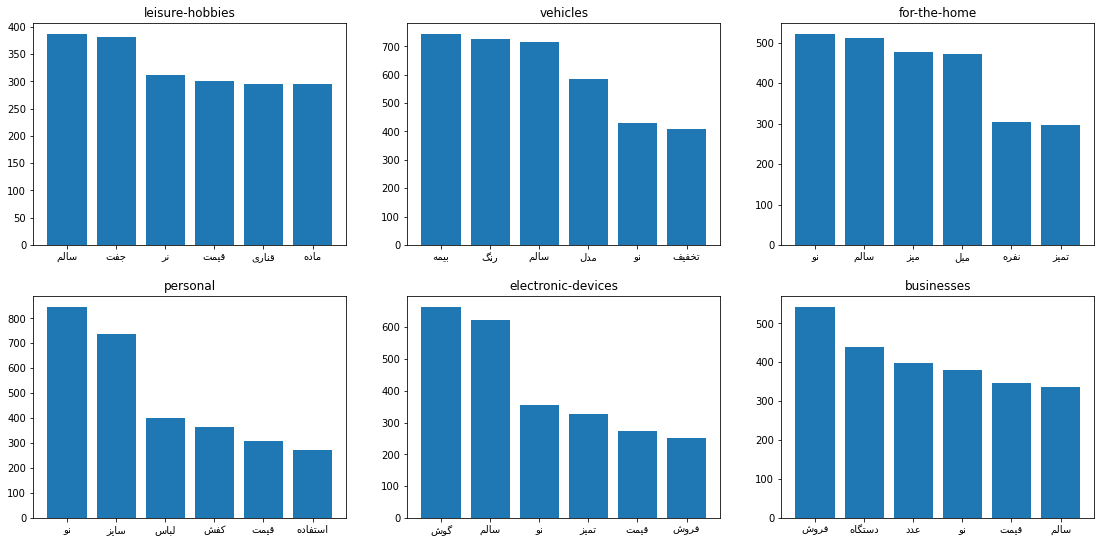

In [17]:
def _(text):
    return get_display(
        arabic_reshaper.reshape(u'%s' % str(text))
    )
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(16, 8)
fig.tight_layout(pad=3.0)
for i in range(2):
    for j in range(3):
        key_index = 3*i + j
        cat = list(all_words.keys())[key_index]
        sorted_words_per_cat = dict(sorted(all_words[cat].items(), key=lambda item: item[1], reverse=True))
        words_per_cat = list(sorted_words_per_cat.keys())[0:6]
        counts_per_cat = list(sorted_words_per_cat.values())[0:6]
        axs[i, j].bar(list(map(lambda x:_(x), words_per_cat)), counts_per_cat)
        axs[i, j].set_title(_(cat))
plt.show()

In [18]:
def categoryMap(df, mapper):
    for i in range(len(df['categories'])):
        df['categories'][i] = mapper.get(df['categories'][i])
    return df

In [19]:

uniqueCategories = traindf['categories'].unique()
categories ={}
for i in range(len(uniqueCategories)):
    categories[uniqueCategories[i]] = i
for category in categories:
    print(category," === ", categories.get(category))

leisure-hobbies  ===  0
vehicles  ===  1
for-the-home  ===  2
personal  ===  3
electronic-devices  ===  4
businesses  ===  5


In [20]:
traindf = categoryMap(traindf, categories)
testdf = categoryMap(testdf, categories)

In [21]:
train_class0 = traindf.loc[traindf['categories'].isin([0])]
train_class1 = traindf.loc[traindf['categories'].isin([1])]
train_class2 = traindf.loc[traindf['categories'].isin([2])]
train_class3 = traindf.loc[traindf['categories'].isin([3])]
train_class4 = traindf.loc[traindf['categories'].isin([4])]
train_class5 = traindf.loc[traindf['categories'].isin([5])]
train_class0

,categories,combined
0,0,"[عدد, بلبل, خرما, ماهه, جوجه, خودم, بزرگشون, د..."
1,0,"[عینک, اسکی, دبل, لنز, مارک, یو, وکس, نو, اصل,..."
6,0,"[بخاطر, جابجایی, قصد, فروش, داشت#دار, وبه, خری..."
9,0,"[چادر, ده, نفره, جنس, یه, استفاده, کلا, تخفیف,..."
12,0,"[باسلام, سفید, نر, پرش, #هست, کبوتر, سفید]"
...,...,...
10181,0,"[دوچرخه, طب, پزشک, قوی, محکم, شیک, تمیز, دوچرخ..."
10189,0,"[دوچرخه, بیست, دنده, تایتانیک, رنگ, سفیدکاملاس..."
10190,0,"[فلسفه, منطق, کتاب, درس, ۱۳۳۶]"
10191,0,"[مخصوص, انواع, پرنده, ابعاد, ۳متر, ۱, ارتفاع, ..."


## Q2:
<div align=center><img src='PriorPosterior .jpg'/></div><br/>

$$ P(c|x) = \frac{P(x|c)P(c)}{P(x)} $$

$x$: The word appeared

$c$: The ad category

$P(x|c)$ : Probability of seeing word $x$ in a ad of category $c$ **(Likelihood)**

$P(c|x)$ : Probability of the current ad category being $c$ knowing that the word $x$ has appeared in the (title+description). **(Posterior)**

$P(c)$: Probability of seeing an ad with category $c$ in the dataset. **(Prior)**


In [22]:
def makeDictOfProb(data_class):
    words_prob = {}
    for index, row in data_class.iterrows():
        for j in range(len(row['combined'])):
            word = row['combined'][j]
            if(word not in words_prob):
                words_prob[word] = 1
            else:
                words_prob[word] = words_prob.get(word)+1
    num_all = sum(words_prob.values())
    for key in words_prob:
        words_prob[key] = (words_prob.get(key))/num_all
    return words_prob

In [23]:
train_class0_words = makeDictOfProb(train_class0)
train_class1_words = makeDictOfProb(train_class1)
train_class2_words = makeDictOfProb(train_class2)
train_class3_words = makeDictOfProb(train_class3)
train_class4_words = makeDictOfProb(train_class4)
train_class5_words = makeDictOfProb(train_class5)
train_all_words = [train_class0_words, train_class1_words,
                    train_class2_words, train_class3_words,
                    train_class4_words, train_class5_words]

In [24]:
all_words_unique = {}
for i in range(len(traindf['combined'])):
    for j in range(len(traindf['combined'][i])):
        word = traindf['combined'][i][j]
        if(word not in all_words_unique):
            all_words_unique[word] = 1
        else:
            all_words_unique[word] = 1 + all_words_unique.get(word)  
num_all_words = sum(all_words_unique.values())
num_all_words

153183

In [25]:
categories_list = list(categories)

In [26]:
test_categories = testdf['categories'].tolist()
test_feature = testdf['combined'].tolist()

## Evaluating Model

* **Accuray** is the number of the correct detections divided by the total number of detection.
 
* **Precision** is the number of correct recommended detections divided by the total number of recommended detections including wrong ones.

* **Recall** is the number of correct recommended detections divided by the total number of recommended in test data.

* **F1** Score is the harmonic mean of the recall and precision.

In [27]:
def calculate_precision_recall_F1(test_categories, pred_cat, classNum):
    precision = 0
    recall = 0
    F1 = 0
    
    detected_class = 0
    for i in range(len(pred_cat)):
        if(test_categories[i] == pred_cat[i]):
            if(pred_cat[i] == classNum):
                detected_class += 1
                
    all_detected_class = 0
    for i in range(len(pred_cat)):
        if(pred_cat[i] == classNum):
            all_detected_class += 1
            
    total_class = 0
    for i in range(len(test_categories)):
        if(test_categories[i] == classNum):
            total_class += 1

    precision = 100*detected_class/all_detected_class
    recall = 100*detected_class/total_class
    F1 = 2*((precision*recall)/(precision+recall))
    
    return precision, recall, F1

In [28]:
import math
def Estimator1(test_feature, trainwordprob):
    prob = 0
    prob = prob + math.log(1/6) #p(c)
    probOfWordsForClass = []
    for i in range(len(test_feature)):
        word = test_feature[i]
        if(word in trainwordprob):
            probOfWordsForClass.append(math.log(trainwordprob.get(word)))
    prob = prob + sum(probOfWordsForClass)
    return prob

In [29]:
predictedc = []
for i in range(len(test_feature)):
    cchance = []
    for j in range(len(train_all_words)):
        cchance_j = Estimator1(test_feature[i],train_all_words[j])         
        cchance.append(cchance_j)
    predictedc.append(cchance.index(max(cchance)))
similar = 0
for i in range(len(test_categories)):
    if(test_categories[i] == predictedc[i]):
        similar +=1
accuracy = similar/(len(test_categories))
print("accuracy: ",accuracy)

accuracy:  0.03944444444444444


## Q10.1:

In [30]:
print('--------------------WITHOUT ADDITIVE SMOOTHING--------------------')
precision_class_0, recall_class_0, F1_class_0 = calculate_precision_recall_F1(test_categories, predictedc, 0)                
print("class 0 precision: ",precision_class_0,"%\nclass 0 recall: ",recall_class_0,"%\nclass 0 F1: ",F1_class_0,"%")   
print()
precision_class_1, recall_class_1, F1_class_1 = calculate_precision_recall_F1(test_categories, predictedc, 1)                
print("class 1 precision: ",precision_class_1,"%\nclass 1 recall: ",recall_class_1,"%\nclass 1 F1: ",F1_class_1,"%")   
print()
precision_class_2, recall_class_2, F1_class_2 = calculate_precision_recall_F1(test_categories, predictedc, 2)                
print("class 2 precision: ",precision_class_2,"%\nclass 2 recall: ",recall_class_2,"%\nclass 2 F1: ",F1_class_2,"%")   
print()
precision_class_3, recall_class_3, F1_class_3 = calculate_precision_recall_F1(test_categories, predictedc, 3)                
print("class 3 precision: ",precision_class_3,"%\nclass 3 recall: ",recall_class_3,"%\nclass 3 F1: ",F1_class_3,"%")   
print()
precision_class_4, recall_class_4, F1_class_4 = calculate_precision_recall_F1(test_categories, predictedc, 4)                
print("class 4 precision: ",precision_class_4,"%\nclass 4 recall: ",recall_class_4,"%\nclass 4 F1: ",F1_class_4,"%")   
print()
precision_class_5, recall_class_5, F1_class_5 = calculate_precision_recall_F1(test_categories, predictedc, 5)                
print("class 5 precision: ",precision_class_5,"%\nclass 5 recall: ",recall_class_5,"%\nclass 5 F1: ",F1_class_5,"%")   
print()
print("accuracy: ",accuracy)
macro_F1 = (F1_class_0 + F1_class_1 + F1_class_2 + F1_class_3 + F1_class_4 + F1_class_5)/6
print("macro F1: ",macro_F1)

--------------------WITHOUT ADDITIVE SMOOTHING--------------------
class 0 precision:  5.0359712230215825 %
class 0 recall:  2.3333333333333335 %
class 0 F1:  3.189066059225513 %

class 1 precision:  1.6990291262135921 %
class 1 recall:  2.3333333333333335 %
class 1 F1:  1.9662921348314604 %

class 2 precision:  2.9702970297029703 %
class 2 recall:  4.0 %
class 2 F1:  3.409090909090909 %

class 3 precision:  5.732484076433121 %
class 3 recall:  6.0 %
class 3 F1:  5.863192182410423 %

class 4 precision:  3.6231884057971016 %
class 4 recall:  5.0 %
class 4 F1:  4.201680672268908 %

class 5 precision:  10.256410256410257 %
class 5 recall:  4.0 %
class 5 F1:  5.755395683453237 %

accuracy:  0.03944444444444444
macro F1:  4.064119606880075


In [31]:
def Estimator2(test_feature, trainwordprob):
    prob = 0
    prob = prob + math.log(1/6) #p(c)
    probOfWordsForClass = []
    n = 0
    minVal = math.log(0.00000001)
    for i in range(len(test_feature)):
        word = test_feature[i]
        if(word in trainwordprob):
            probOfWordsForClass.append(math.log(trainwordprob.get(word)))
        else:
            n += 1
    for i in range(n):
        if(len(probOfWordsForClass) == 0):
            probOfWordsForClass.append(minVal)
        else:
            probOfWordsForClass.append(min(probOfWordsForClass))
    prob = prob + sum(probOfWordsForClass)
    return prob

In [32]:
predictedc = []
for i in range(len(test_feature)):
    cchance = []
    for j in range(len(train_all_words)):
        cchance_j = Estimator2(test_feature[i],train_all_words[j])         
        cchance.append(cchance_j)
    predictedc.append(cchance.index(max(cchance)))
similar = 0
for i in range(len(test_categories)):
    if(test_categories[i] == predictedc[i]):
        similar +=1
accuracy = similar/(len(test_categories))
print("accuracy: ",accuracy)

accuracy:  0.7077777777777777


In [33]:
def Estimator3(test_feature, trainwordprob, num_all_words):
    prob = 0
    prob = prob + math.log(1/6) #p(c)
    probOfWordsForClass = []
    n = 0
    alpha = 1
    for i in range(len(test_feature)):
        word = test_feature[i]
        if(word in trainwordprob):
            probOfWordsForClass.append(math.log(trainwordprob.get(word)))
        else:
            n += 1
    for i in range(n):
        probOfWordsForClass.append(math.log((0+alpha)/(num_all_words)))
    prob = prob + sum(probOfWordsForClass)
    return prob

In [34]:
predictedc = []
for i in range(len(test_feature)):
    cchance = []
    for j in range(len(train_all_words)):
        cchance_j = Estimator3(test_feature[i],train_all_words[j], num_all_words)                      
        cchance.append(cchance_j)
    predictedc.append(cchance.index(max(cchance)))
similar = 0
for i in range(len(test_categories)):
    if(test_categories[i] == predictedc[i]):
        similar +=1
accuracy = 100*similar/(len(test_categories))
print("accuracy: ",accuracy)

accuracy:  87.16666666666667


## Q10.2:

In [35]:
print('---------------------WITH ADDITIVE SMOOTHING---------------------')
precision_class_0, recall_class_0, F1_class_0 = calculate_precision_recall_F1(test_categories, predictedc, 0)                
print("class 0 precision: ",precision_class_0,"%\nclass 0 recall: ",recall_class_0,"%\nclass 0 F1: ",F1_class_0,'%')   
print()
precision_class_1, recall_class_1, F1_class_1 = calculate_precision_recall_F1(test_categories, predictedc, 1)                
print("class 1 precision: ",precision_class_1,"%\nclass 1 recall: ",recall_class_1,"%\nclass 1 F1: ",F1_class_1,'%')   
print()
precision_class_2, recall_class_2, F1_class_2 = calculate_precision_recall_F1(test_categories, predictedc, 2)                
print("class 2 precision: ",precision_class_2,"%\nclass 2 recall: ",recall_class_2,"%\nclass 2 F1: ",F1_class_2,'%')   
print()
precision_class_3, recall_class_3, F1_class_3 = calculate_precision_recall_F1(test_categories, predictedc, 3)                
print("class 3 precision: ",precision_class_3,"%\nclass 3 recall: ",recall_class_3,"%\nclass 3 F1: ",F1_class_3,'%')   
print()
precision_class_4, recall_class_4, F1_class_4 = calculate_precision_recall_F1(test_categories, predictedc, 4)                
print("class 4 precision: ",precision_class_4,"%\nclass 4 recall: ",recall_class_4,"%\nclass 4 F1: ",F1_class_4,'%')   
print()
precision_class_5, recall_class_5, F1_class_5 = calculate_precision_recall_F1(test_categories, predictedc, 5)                
print("class 5 precision: ",precision_class_5,"%\nclass 5 recall: ",recall_class_5,"%\nclass 5 F1: ",F1_class_5,'%')   
print()
print("accuracy: ",accuracy)
macro_F1 = (F1_class_0 + F1_class_1 + F1_class_2 + F1_class_3 + F1_class_4 + F1_class_5)/6
print("macro F1: ",macro_F1)

---------------------WITH ADDITIVE SMOOTHING---------------------
class 0 precision:  92.1146953405018 %
class 0 recall:  85.66666666666667 %
class 0 F1:  88.77374784110536 %

class 1 precision:  92.85714285714286 %
class 1 recall:  91.0 %
class 1 F1:  91.91919191919192 %

class 2 precision:  82.9113924050633 %
class 2 recall:  87.33333333333333 %
class 2 F1:  85.06493506493507 %

class 3 precision:  89.52702702702703 %
class 3 recall:  88.33333333333333 %
class 3 F1:  88.92617449664431 %

class 4 precision:  90.52287581699346 %
class 4 recall:  92.33333333333333 %
class 4 F1:  91.41914191419141 %

class 5 precision:  76.05177993527508 %
class 5 recall:  78.33333333333333 %
class 5 F1:  77.17569786535304 %

accuracy:  87.16666666666667
macro F1:  87.21314818357018


## Q3:
* ماشین بدون خط و خش
* دارای خط و خش
* دفتر خط کشی شده
<br />
همانطور که مشخص است جمله اول مربوط به کلاس وسایل نقلیه بوده و مفهوم مثبت دارد و جمله دوم متعلق به کلاس وسایل نقلیه بوده ولی مفهوم منفی دارد و جمله سوم به احتمال زیاد مربوط به کلاس لوازم تحریر یا وسایل شخصی می باشد ولی کلمه **خط** در هر سه مشترک است. در نتیجه استفاده از بایگرام یا 3-گرام ها به ما این امکان را می دهد که با توجه به لغات بعدی و قبلی تخمین دقیق تری درباره مفهوم این کلمه داشته باشیم

## Q4:
In our model we are calculating the sum of $log$ of probabilities. So, if a word doesn't exist in our dataset it will get probability of $\log(0) = -\infty$ and that class's probability would be almost zero

## Q5:
The frequency-based probability might introduce zeros when multiplying the probabilities, leading to a failure in preserving the information contributed by the non-zero probabilities. Therefore, a smoothing approach, for example, the Additive Smoothing, must be adopted to counter this problem.
<br/>
**Additive Smoothing** is a technique to smooth categorical data. This technique is introduced to solve the problem of *zero probability*. A small-sample correction, or pseudo-count, will be incorporated in every probability estimate.

## Q7:
* **Precision**:
    * $$\frac{TP}{TP + FP}$$
    * Precision can be thought of as a measure of a classifiers exactness. A low precision, indicates a large number of False Positives.

* **Recall**:
    * $$\frac{TP}{TP + FN}$$
    * It is also called Sensitivity
    * Recall can be thought of as a measure of a classifiers completeness. A low recall indicates many False Negatives.

مشاهده می‌شود که «صحت» کلاس 2 نسبت به «پوشش» آن کم‌تر است. دلیل این امر این است که این طبقه‌بند، تعداد زیادی از آگهی های داده تست را در طبقه 2‌ قرار داده، در حالی که مربوط به آن نبوده‌اند (پس صحت کاهش می‌یابد). با این حال، تعداد زیادی از آگهی هایی را که مربوط به این طبقه بوده‌اند، در همین طبقه قرار داده است (پس پوشش افزایش می‌یابد). در واقع می‌توان گفت که این طبقه‌بند نسبت به کلاس گفته‌شده دارای مقداری بایاس است. این موضوع باعث کاهش دقت طبقه‌بند شده‌است. پس می‌توان گفت که مقادیر صحت و پوشش هر کلاس به تنهایی برای ارزیابی مدل کافی نیستند و هر کدام بخشی از عملکرد مدل را نشان می‌دهند


## Q8:
<div align=center><img src='harmonic.png'></div><br />
<div align=right>
میانگین هم‌ساز یا هارمونیک که از رابطه شکل بالا محاسبه می‌شود، معمولاً هنگامی کاربرد دارد که محاسبه میانگین نرخ‌ها اهمیت داشته باشد. در موارد خاص که فقط دو عدد وجود دارد، میانگین هارمونیک را می‌توان از رابطه معیار اف-۱ به دست آورد. می‌توان ثابت کرد که میانگین هم‌ساز همواره کوچک‌تر یا مساوی میانگین حسابی است. همچنین، از این میانگین تنها برای اعداد مثبت استفاده می‌شود. اهمیت استفاده از این روش میانگین‌گیری را می‌توان در یک مثال بررسی کرد: فرض کنید که برای یک کلاس، صحت حدود ۱۰۰ درصد و پوشش حدود صفر به دست بیاید. یعنی طبقه‌بند تعداد کمی از آگهی ها را در کلاس موردنظر قرار داده، با این حال همان‌هایی را هم که قرار داده، درست بوده‌اند. مشاهده می‌شود که میانگین حسابی مقادیر صحت و پوشش حدود ۵۰ درصد به دست می‌آید، در حالی که معیار اف-۱ این میانگین را حدود صفر نشان می‌دهد! بنابراین، اگر با میانگین حسابی عملکرد طبقه‌بند را ارزیابی می‌کردیم، به اشتباه می‌افتادیم. به طور کلی می‌توان گفت که میانگین هم‌ساز، مقادیر بیش از حد را در نظر نگرفته و یک خروجی متعادل می‌دهد
</div>
<div align=center><img src='f1.png'></div><br />

<div align=left> </div> 

## Q9:

* Macro:
    * میانگین حسابی مقادیر اف-۱ کلاس‌ها
* Micro:
    * برابر با همان دقت است یعنی تعداد طبقه‌بندی‌های درست تقسیم بر تعداد کل نمونه‌ها
* Weighted:
    * میانگین وزن‌دار مقادیر اف-۱ کلاس‌ها که در آن وزن هر مقدار را می‌توان نسبت تعداد نمونه‌های آن کلاس به تعداد کل نمونه‌ها در نظر گرفت


<div align=left> </div> 

## Q11:
* Without Additive Smoothing, there were some words in the *testset* that didn't exist in the *trainset* & $\log(0) = -\infty$ so this lead us to wrong labeling.
* With Additive Smoothing this problem was solved because for those words that didn't exist in the *trainset*, we used $\alpha = 1$. Additive Smoothing really helped us with predicting because we are not going to lose probability if the word did not exist in the train set.

In [36]:
reverse = {}
for key, value in categories.items():
    reverse[value] = key

## Q12:

In [44]:
predicted_label = []
actual_label = []
num_iteration = []

for i in range(len(predictedc)):
    if(predictedc[i] != test_categories[i]):
        predicted_label.append(predictedc[i])
        actual_label.append(test_categories[i])
        num_iteration.append(i)

In [46]:

for i in range(5):
    print("#",i+1)
    print(testdf['combined'][num_iteration[i]])
    print("unfortunately labeled: ", reverse[predicted_label[num_iteration[i]]])
    print("Actual label: ", reverse[actual_label[num_iteration[i]]])
    print()

# 1
['سیپوراکس', 'میکرو', 'مک', 'جی', 'ال', 'سرامیک', 'سرا', 'کاهنده', 'نیترات', 'نیتریت', 'اکواریوم', 'درجه', 'سیپوراکس']
unfortunately labeled:  for-the-home
Actual label:  personal

# 2
['عینک', 'آفتاب', '١٠٠', '\u200f', 'UV', 'Protection', 'عینک', 'آفتاب']
unfortunately labeled:  electronic-devices
Actual label:  businesses

# 3
['جنس', 'اهن', 'کار', 'دست', 'عرضه', 'صورت', 'عمده', 'تک', 'موتور', 'تزیین']
unfortunately labeled:  electronic-devices
Actual label:  vehicles

# 4
['اصل', 'المان', 'سایز', '۱۵', 'مقاوم', 'اچارشلاقی', 'HEYCOالمان']
unfortunately labeled:  leisure-hobbies
Actual label:  personal

# 5
['سلام', 'تلفکس', 'پاناسونیک', 'تمیز', 'کار', 'فروش', 'تلفکس']
unfortunately labeled:  businesses
Actual label:  personal

